In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
%matplotlib notebook

In [2]:
def singlePoint(rd,zd,d=1):
    
    return (2/np.sqrt(rd**2+zd**2) - 1/np.sqrt(rd**2+zd**2-2*zd+1) - 1/np.sqrt(rd**2+zd**2+2*zd+1))/d**3

<IPython.core.display.Javascript object>


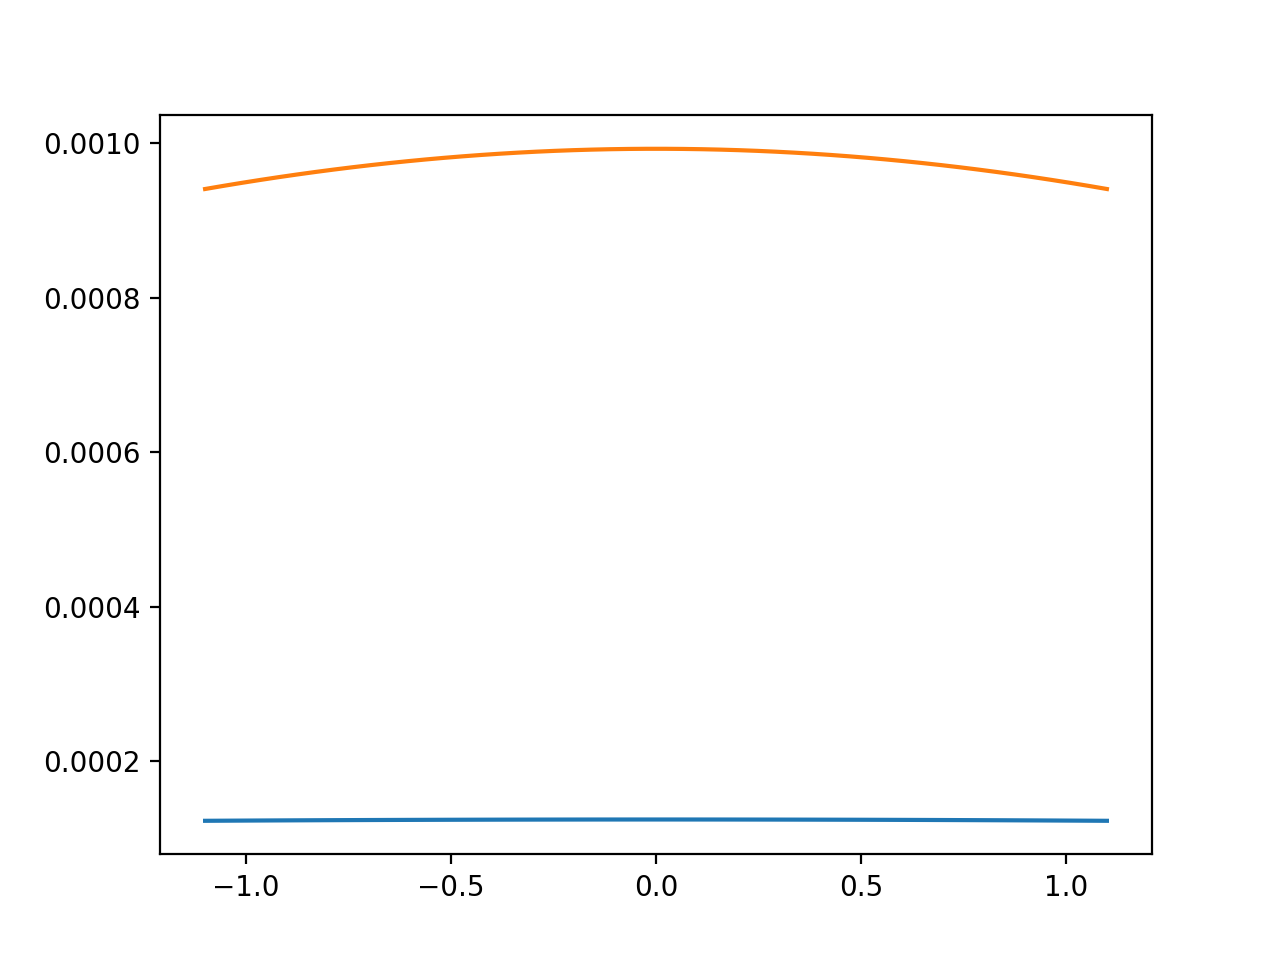

In [3]:
zd = np.linspace(-1.1,1.1)
plt.figure()
plt.plot(zd,singlePoint(20,zd))
plt.plot(zd,singlePoint(10,zd))
plt.show()

In [289]:
np.sum(singlePoint(rd,zd))

-8.208141566610744

<IPython.core.display.Javascript object>


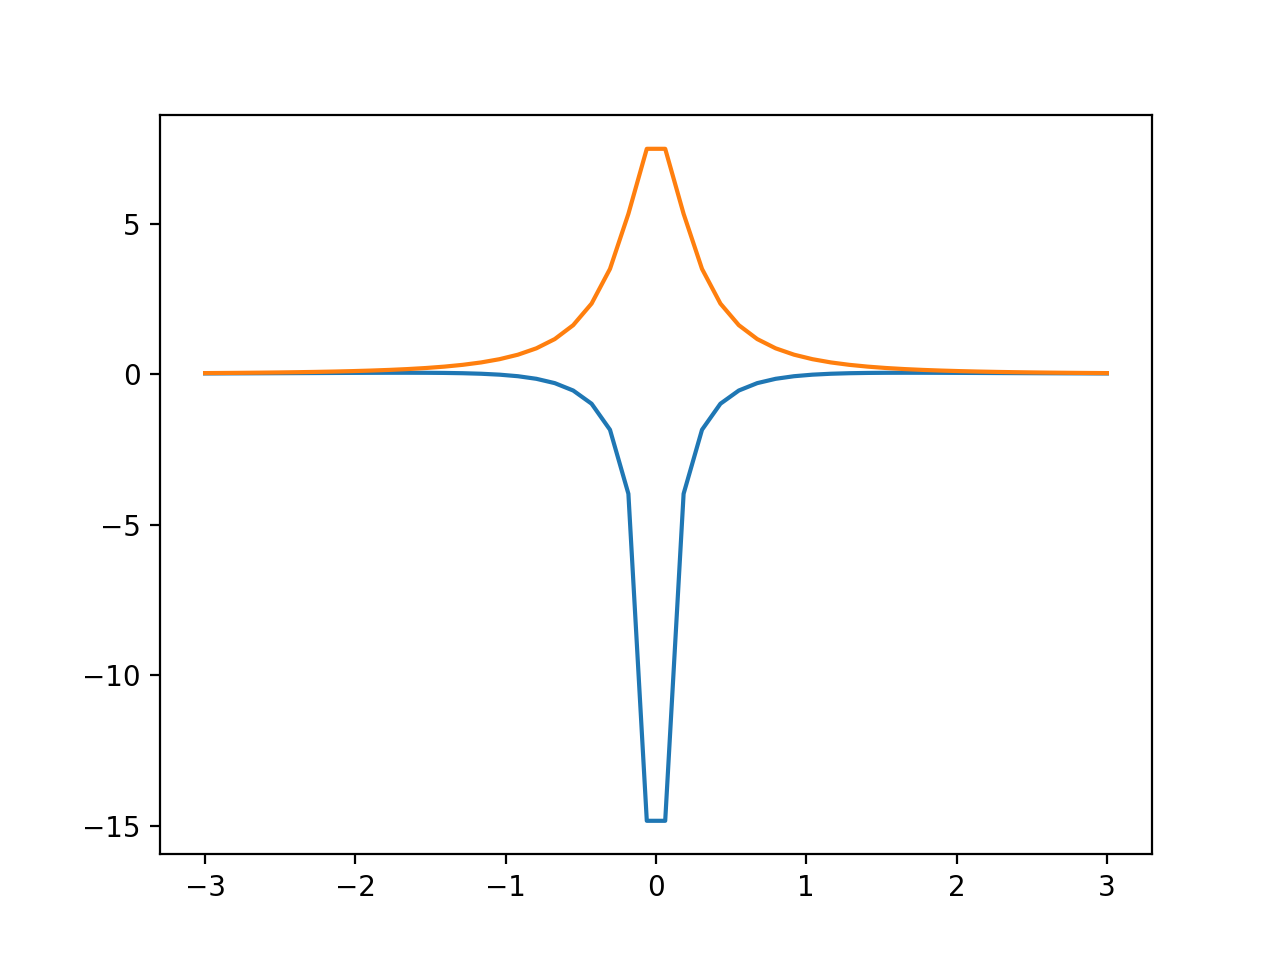

In [4]:
r = np.linspace(-3,3)
plt.figure()
plt.plot(r,singlePoint(r,1))
plt.plot(r,singlePoint(r,.2))
plt.show()

<IPython.core.display.Javascript object>


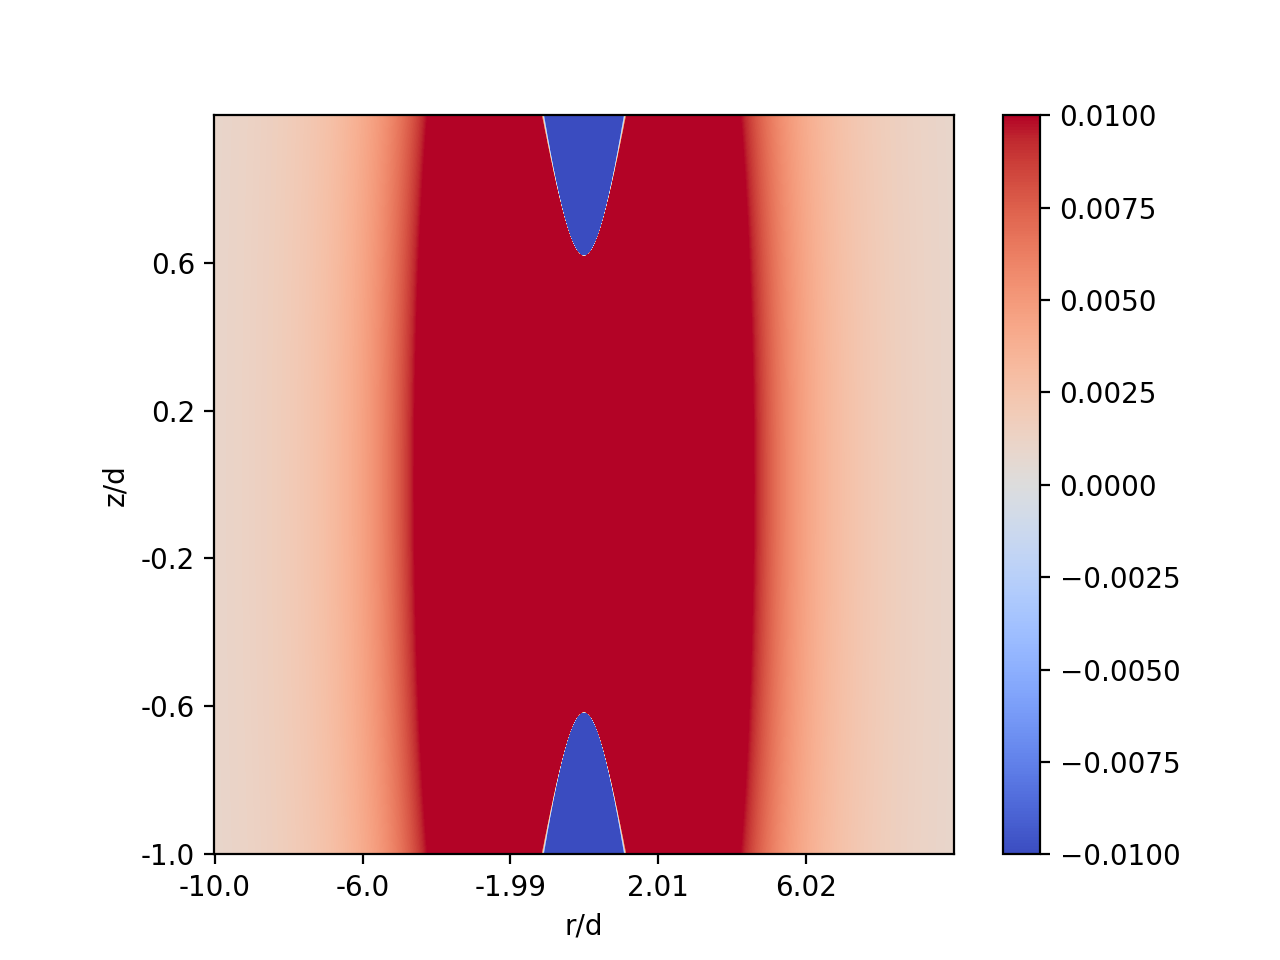

Text(0, 0.5, 'z/d')

In [5]:
r = np.linspace(-10,10,1000)
z = np.linspace(-1,1,1000)
R,Z, = np.meshgrid(r,z)
P = singlePoint(R,Z)

fig = plt.figure()
ax = fig.add_subplot(111)
im = plt.imshow(P,origin='lower',cmap='coolwarm',vmin=-.01,vmax=.01)
ax.set_xticks([0,200,400,600,800])
ax.set_xticklabels([np.round(r[0],2),np.round(r[200],2),np.round(r[400],2),np.round(r[600],2),np.round(r[800],2)])
ax.set_yticks([0,200,400,600,800])
ax.set_yticklabels([np.round(z[0],2),np.round(z[200],2),np.round(z[400],2),np.round(z[600],2),np.round(z[800],2)])
cb = plt.colorbar(im)

plt.xlabel('r/d')
plt.ylabel('z/d')

In [6]:
def contribution(dn,z2d):
    
    prefactor = -1/dn * np.sqrt(2)*np.pi**(3/2)
    
    term1 = -2 * np.exp((z2d*dn)**2/2) * erfc(dn*z2d/np.sqrt(2))
    term2 = np.exp(((1+z2d)*dn)**2/2) * erfc(dn*(1+z2d)/np.sqrt(2))
    term3 = np.exp(((1-z2d)*dn)**2/2) * erfc(np.abs(dn*(1-z2d))/np.sqrt(2))
    
    return prefactor *(term1+term2+term3)

In [7]:
def contribution2(dn,zn):
    
    prefactor = -np.sqrt(2)*np.pi**(3/2)
    
    term1 = -2 * np.exp(zn**2/2) * erfc(zn/np.sqrt(2))
    term2 = np.exp((dn+zn)**2/2) * erfc((dn+zn)/np.sqrt(2))
    term3 = np.exp((dn-zn)**2/2) * erfc(np.abs(dn-zn)/np.sqrt(2))
    
    return prefactor *(term1+term2+term3)/dn

In [32]:

dn_max = 9
dn = np.linspace(0,dn_max,1000)

z2d_max = 3

z2d = np.linspace(0,z2d_max,1000)

DD, ZZ = np.meshgrid(dn,z2d)
c = contribution(DD,ZZ)

<ipython-input-6-27cf00648f9b>:3: RuntimeWarning: divide by zero encountered in true_divide
  prefactor = -1/dn * np.sqrt(2)*np.pi**(3/2)
<ipython-input-6-27cf00648f9b>:9: RuntimeWarning: invalid value encountered in multiply
  return prefactor *(term1+term2+term3)


In [12]:
zn = np.linspace(0,1,1000)

In [13]:
DN, ZN = np.meshgrid(dn,zn)

In [14]:
c2 = contribution2(DN,ZN)

<ipython-input-7-4fa9bd0160df>:9: RuntimeWarning: invalid value encountered in true_divide
  return prefactor *(term1+term2+term3)/dn


<IPython.core.display.Javascript object>


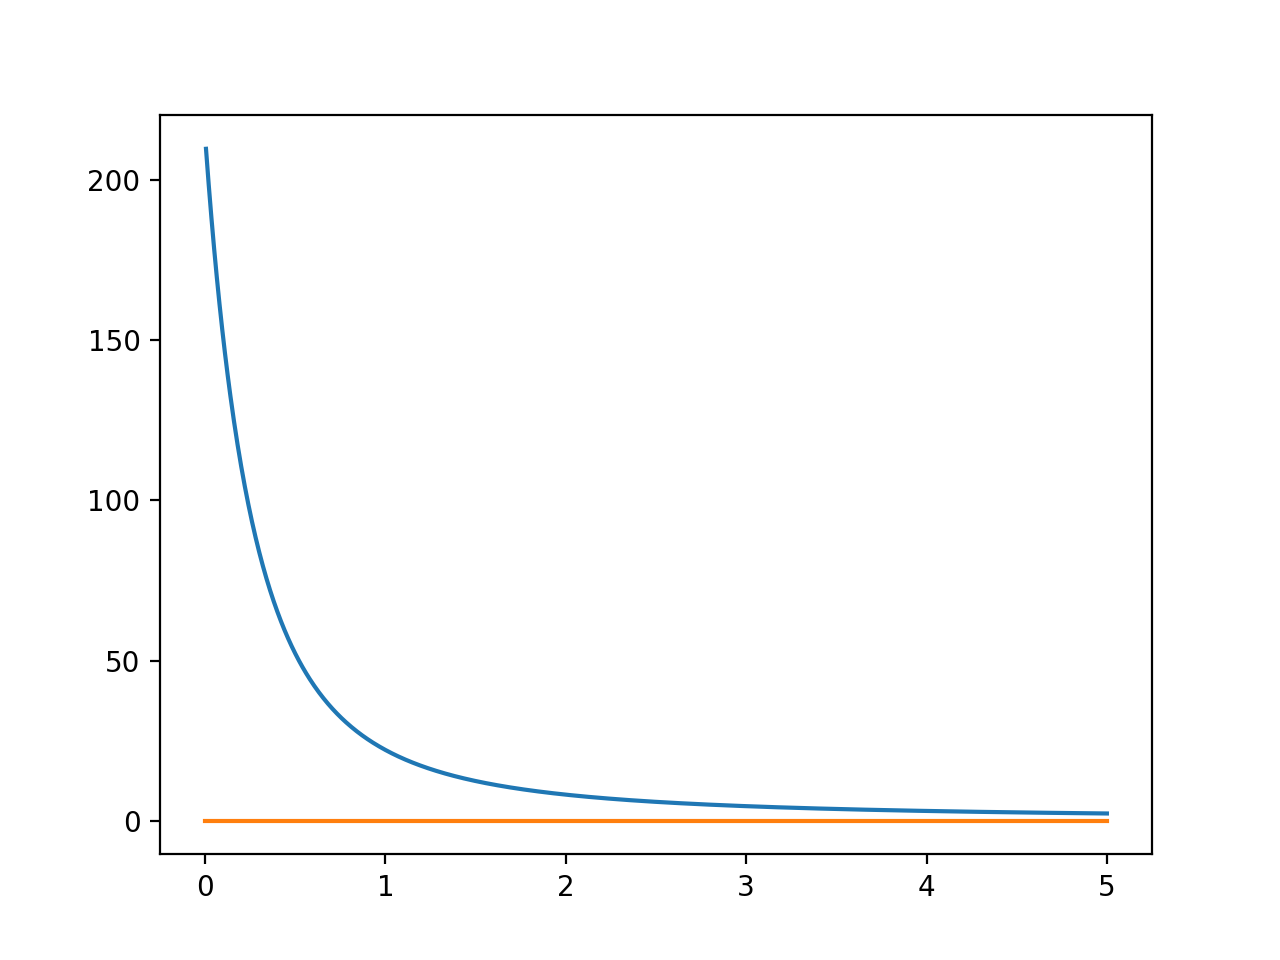

In [15]:
plt.figure()
plt.plot(dn,np.sum(c,axis=0))
plt.plot(dn,np.zeros_like(dn))

<IPython.core.display.Javascript object>


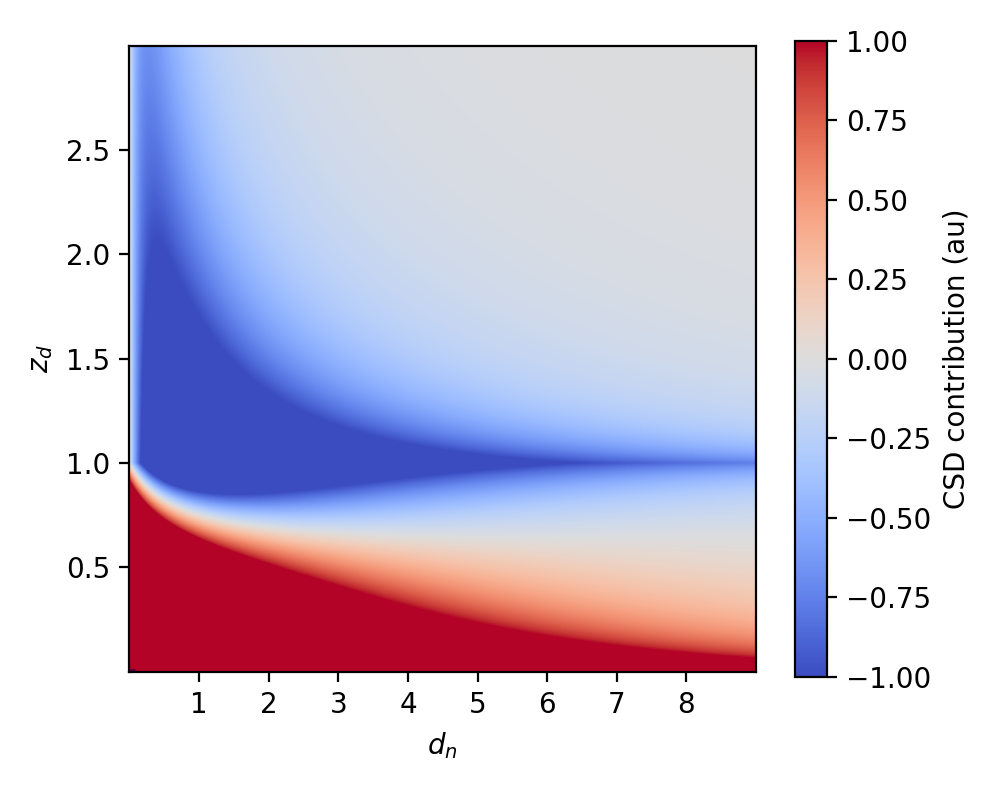

In [48]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

ax.contour(DD,ZZ,c,levels=[0])

im = plt.imshow(c,cmap='coolwarm',vmin=-1,vmax=1,origin='lower')

desired_xticklabels = np.arange(1,9)
desired_xticks = len(dn)/(dn_max/desired_xticklabels)

ax.set_xticks(desired_xticks)
ax.set_xticklabels(desired_xticklabels)

desired_yticklabels = np.arange(0.5,3,.5)
desired_yticks = len(z2d)/(z2d_max/desired_yticklabels)

ax.set_yticks(desired_yticks)
ax.set_yticklabels(desired_yticklabels)


plt.colorbar(im,label='CSD contribution (au)')
ax.set_ylabel('$z_d$')
ax.set_xlabel('$d_n$')

plt.tight_layout()

plt.savefig('analytic.png',dpi=600)
plt.show()

<IPython.core.display.Javascript object>


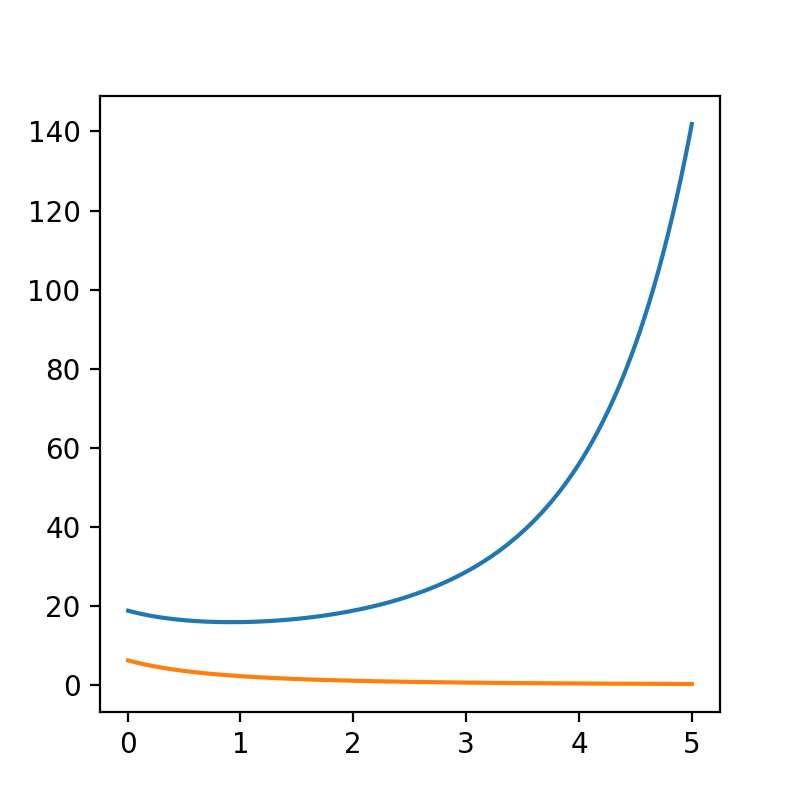

In [411]:
plt.figure(figsize=(4,4))
plt.plot(dn,c[0])
plt.plot(dn,c[-1])

<IPython.core.display.Javascript object>


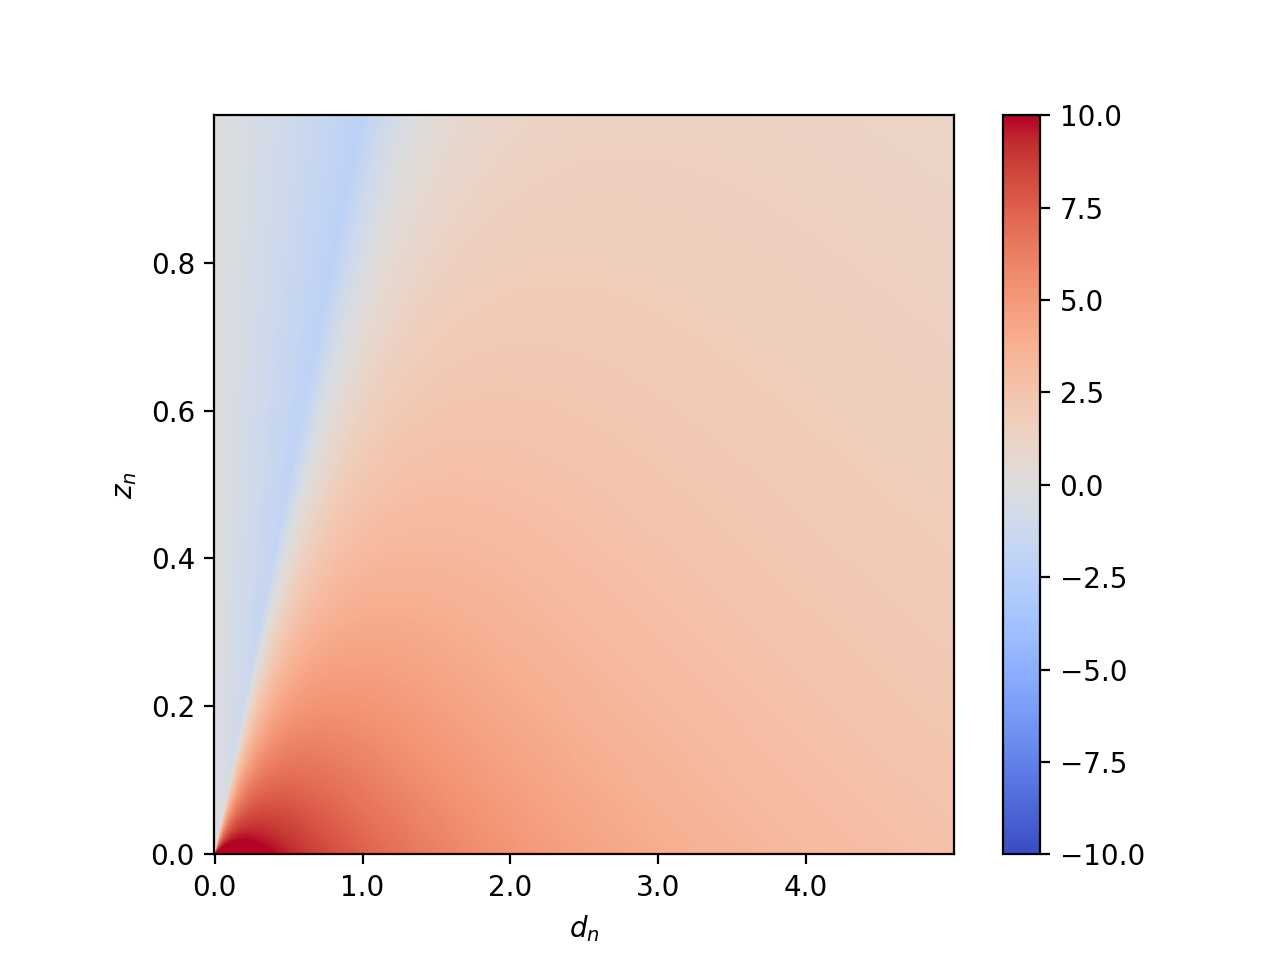

Text(0.5, 0, '$d_n$')

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = plt.imshow(c2,cmap='coolwarm',vmin=-10,vmax=10,origin='lower')
ax.set_xticks([0,200,400,600,800])
ax.set_xticklabels([np.round(dn[0],2),np.round(dn[200],2),np.round(dn[400],2),np.round(dn[600],2),np.round(dn[800],2)])
ax.set_yticks([0,200,400,600,800])
ax.set_yticklabels([np.round(zn[0],2),np.round(zn[200],2),np.round(zn[400],2),np.round(zn[600],2),np.round(zn[800],2)])
plt.colorbar(im)
ax.set_ylabel('$z_n$')
ax.set_xlabel('$d_n$')

<IPython.core.display.Javascript object>


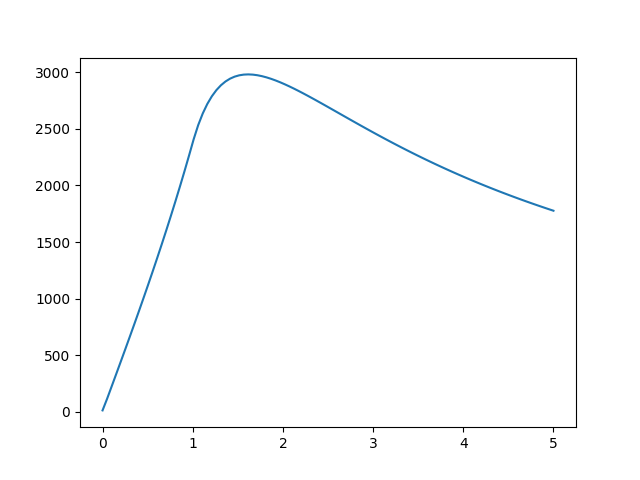

In [315]:
plt.figure()
plt.plot(dn,np.sum(c2,axis=0))

<IPython.core.display.Javascript object>


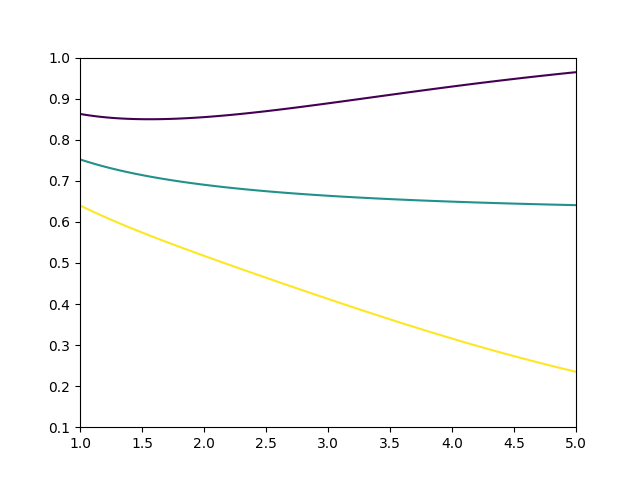

In [362]:
plt.figure()
plt.contour(DD,ZZ,c,levels=[-1,0,1])


<IPython.core.display.Javascript object>


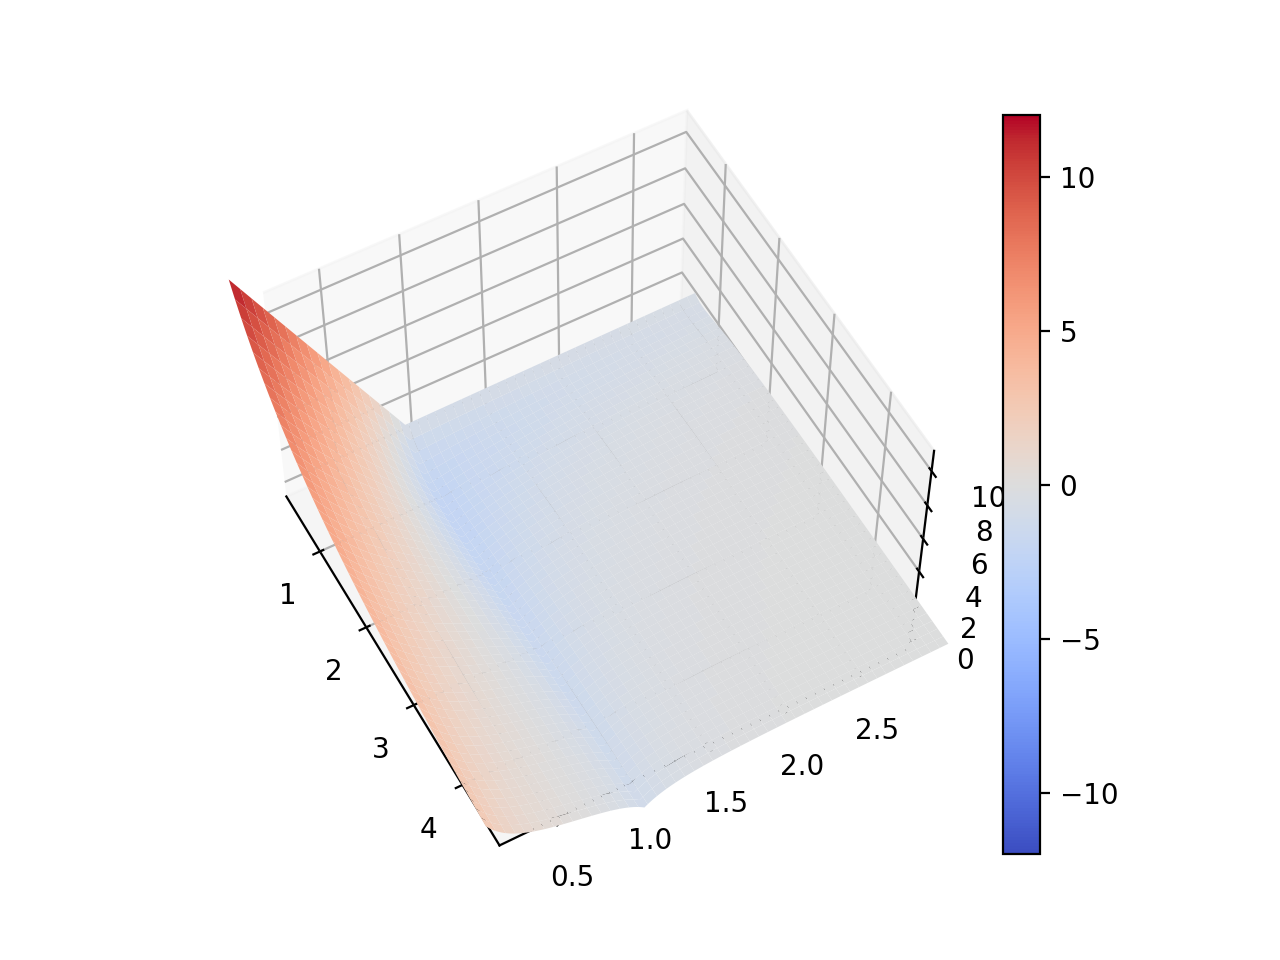

<ipython-input-24-08cb86e69da4>:3: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(DD,ZZ,c, cmap=cm.coolwarm,vmin=-12,vmax=12)


In [24]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(DD,ZZ,c, cmap=cm.coolwarm,vmin=-12,vmax=12)
plt.colorbar(surf)